In [579]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [580]:
# Load dataset
df = pd.read_csv("House_Price.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [581]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [582]:
df.sample()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
479,2940000,3660,4,1,2,no,no,no,no,no,0,no,unfurnished


In [583]:
df.shape

(545, 13)

In [584]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [585]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [586]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [587]:
df.duplicated().sum()

np.int64(0)

In [588]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [589]:
# Handle Categorical Variables
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 1, 'semi-furnished': 2, 'unfurnished': 3})


In [590]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

In [591]:
corr = df.corr(numeric_only=True)
print(corr['price'].sort_values(ascending=False))

price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
furnishingstatus   -0.304721
Name: price, dtype: float64


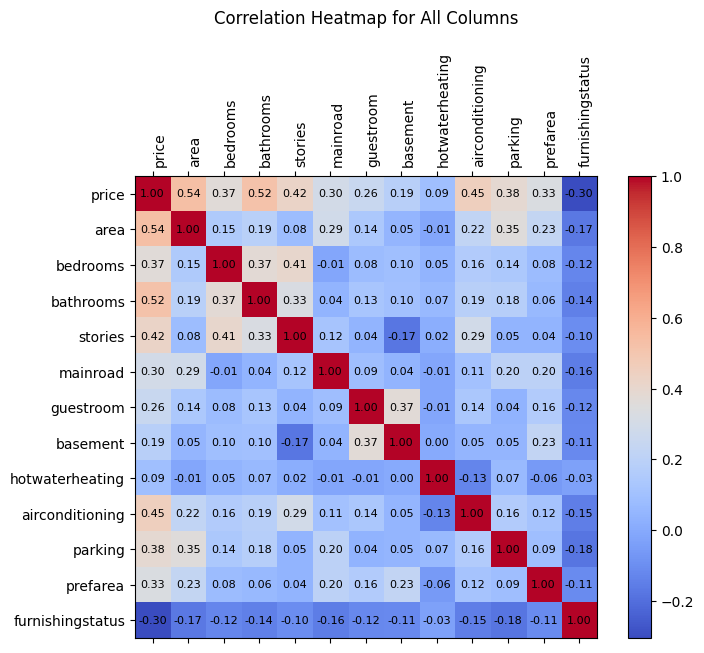

In [592]:
# Correlation Heatmap for All Columns
fig, ax = plt.subplots(figsize=(8,6))
cax = ax.matshow(corr, cmap='coolwarm')
plt.colorbar(cax)
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90, ha='left')
ax.set_yticklabels(corr.columns)
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='black', fontsize=8)
plt.title("Correlation Heatmap for All Columns", pad=20)
plt.show()

Skewness of numeric columns:
 price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64


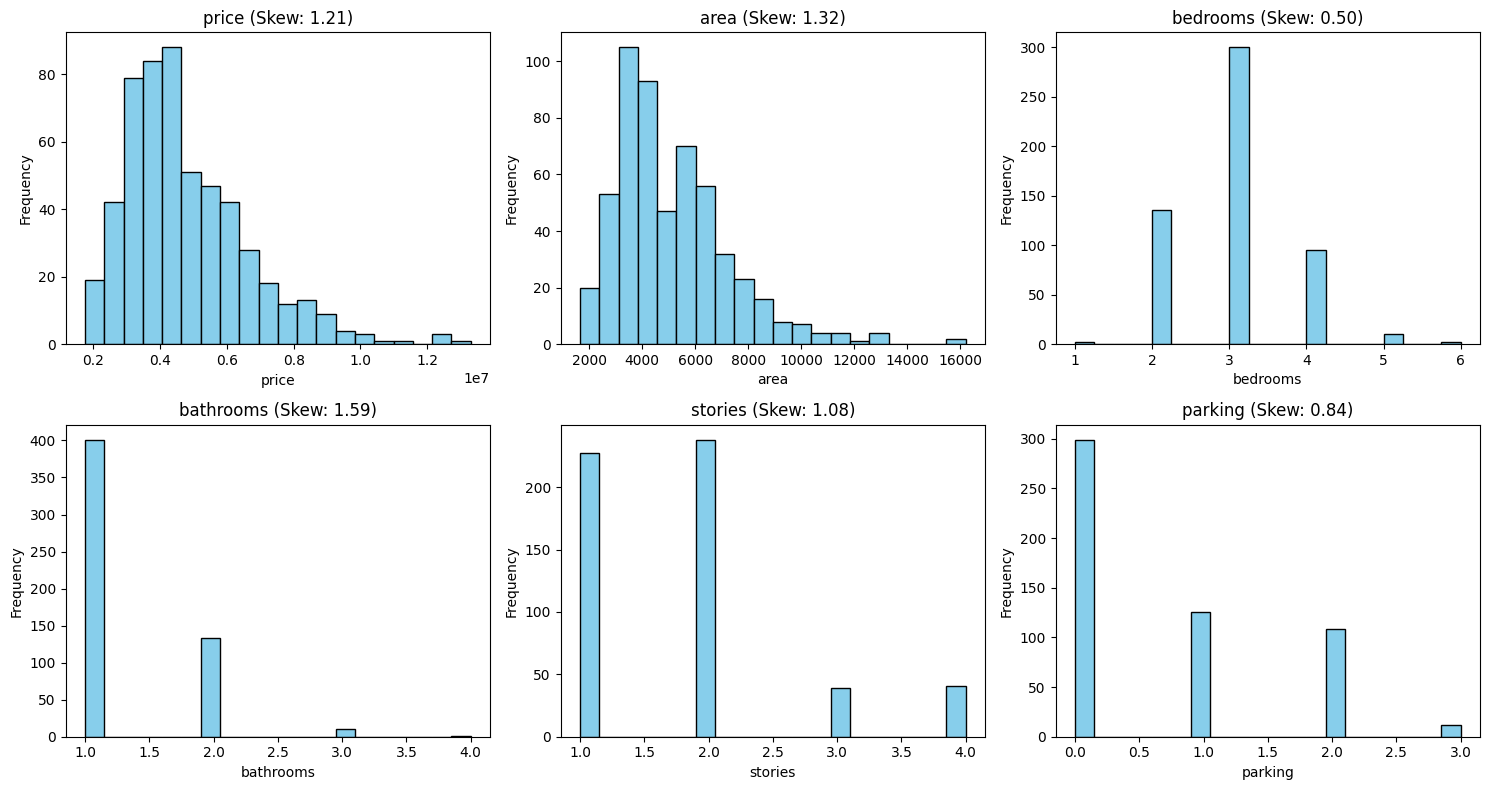

In [593]:
# Detect Skewness and Plot data distribution
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
skewness = df[numeric_cols].skew()
print("Skewness of numeric columns:\n", skewness)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f"{col} (Skew: {df[col].skew():.2f})")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [594]:
# Apply log transformation to highly skewed columns
df['price_log'] = np.log1p(df['price'])
df['area_log'] = np.log1p(df['area'])
df['bathrooms_log'] = np.log1p(df['bathrooms'])
df['stories_log'] = np.log1p(df['stories'])
df['parking_log'] = np.log1p(df['parking'])

numeric_cols_log = ['price_log', 'area_log', 'bathrooms_log', 'stories_log', 'parking_log']
skewness_log = df[numeric_cols_log].skew()
print("Skewness of numeric columns after log transformation:\n", skewness_log)

Skewness of numeric columns after log transformation:
 price_log        0.140863
area_log         0.133747
bathrooms_log    1.310299
stories_log      0.525950
parking_log      0.501800
dtype: float64


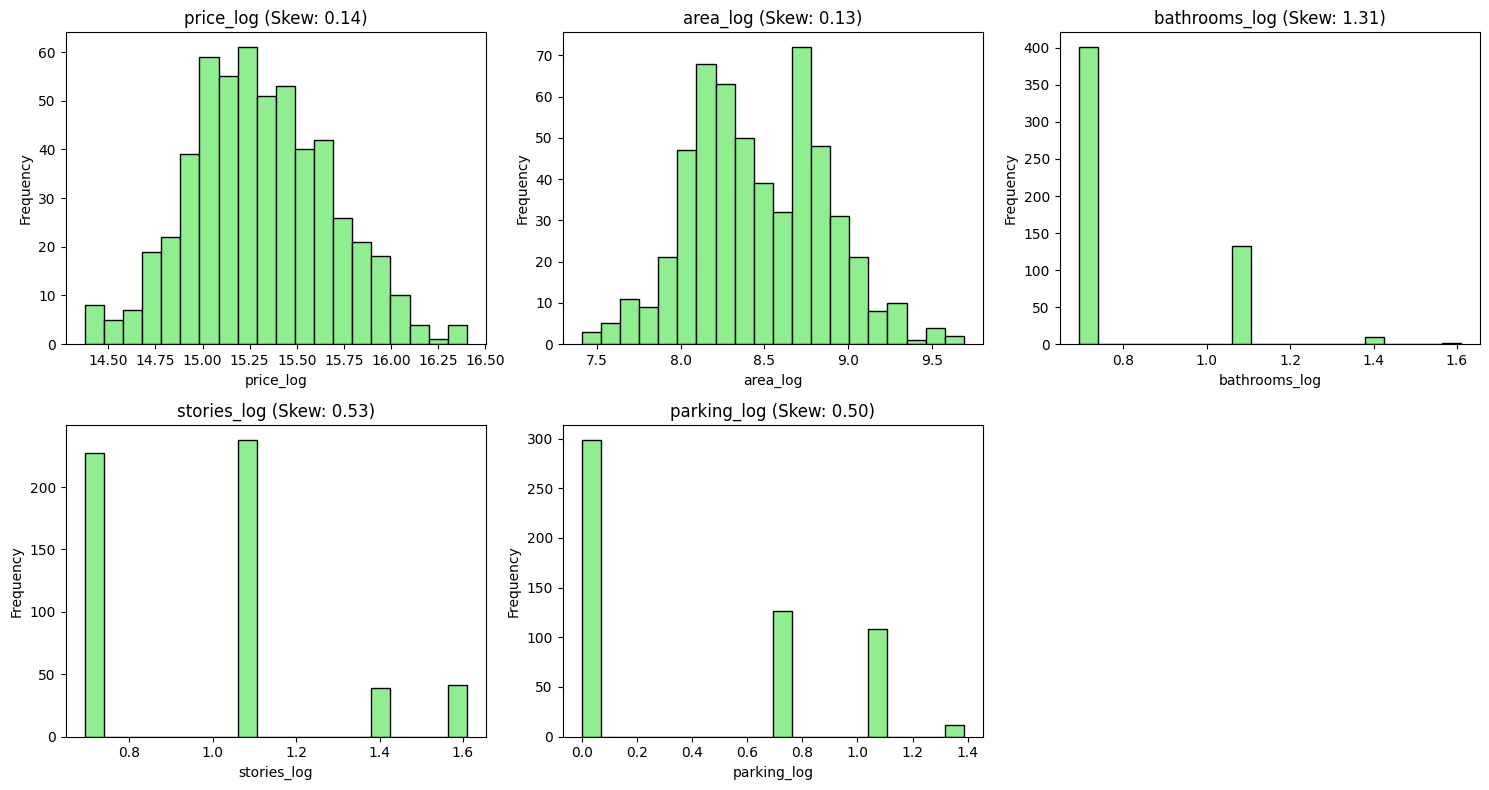

In [595]:
# Plot after log transformation
numeric_cols = ['price_log', 'area_log', 'bathrooms_log', 'stories_log', 'parking_log']
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=20, color='lightgreen', edgecolor='black')
    axes[i].set_title(f"{col} (Skew: {df[col].skew():.2f})")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
if len(numeric_cols) < len(axes):
    for j in range(len(numeric_cols), len(axes)):
        axes[j].axis('off')
plt.tight_layout()
plt.show()

In [596]:
# Detect outliers using IQR
outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = outliers.shape[0]
print("Number of outliers per column:")
for col, count in outlier_summary.items():
    print(f"{col}: {count}")

Number of outliers per column:
price_log: 1
area_log: 2
bathrooms_log: 0
stories_log: 0
parking_log: 0


In [597]:
# Select features and Target
X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']

In [598]:
print("Selected Features:")
X.head()

Selected Features:


,area,bedrooms,bathrooms
0,7420,4,2
1,8960,4,4
2,9960,3,2
3,7500,4,2
4,7420,4,1


In [599]:
print("Target Variable:")
y.head()

Target Variable:


0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [600]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training and Testing Data Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)


Training and Testing Data Shapes:
X_train: (436, 3)
X_test: (109, 3)


In [601]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [602]:
# Make prediction on test set
y_pred = model.predict(X_test)

In [603]:
# Evaluate model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Model Evaluation Metrics:")
print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")

Model Evaluation Metrics:
R² Score: 0.456
MSE: 2750040479309.052


In [604]:
base_price = model.intercept_
print(f"Base Price (Intercept): ₹{base_price:.2f}")


Base Price (Intercept): ₹59485.38


In [605]:
# Predict New House Price
new_house = pd.DataFrame({'area': [2500], 'bedrooms': [3], 'bathrooms': [2]})
predicted_price = model.predict(new_house)[0]
print("\nPredicted Price for given house:")
print(f"Area = 2500 sq.ft, Bedrooms = 3, Bathrooms = 2")
print(f"Predicted Price: ₹{predicted_price:.2f}")


Predicted Price for given house:
Area = 2500 sq.ft, Bedrooms = 3, Bathrooms = 2
Predicted Price: ₹4848384.07


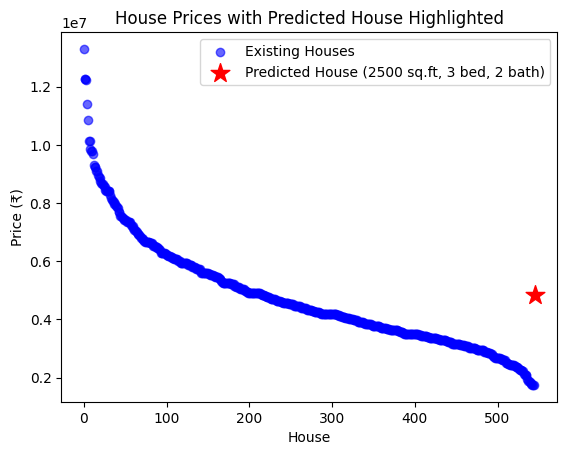

In [606]:
# Plot for New House Price
plt.scatter(range(len(df['price'])), df['price'], color='blue', alpha=0.6, label='Existing Houses')
plt.scatter(len(df), predicted_price, color='red', marker='*', s=200, label='Predicted House (2500 sq.ft, 3 bed, 2 bath)')
plt.xlabel("House")
plt.ylabel("Price (₹)")
plt.title("House Prices with Predicted House Highlighted")
plt.legend()
plt.show()

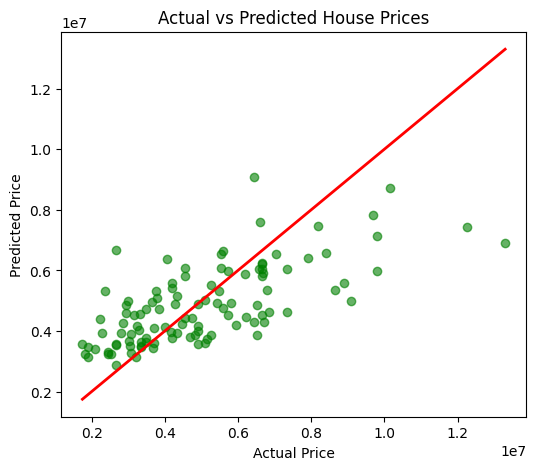

In [607]:
#Plot for Actual vs Predicted House Prices
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()